In [8]:
import numpy as np 
import matplotlib.pyplot as plt 

def fit_line(x1, x2, y1, y2):
    if x1 != x2:
        a = (y1 - y2)/(x1 - x2)
        b = y1 - a * x1
        return a, b
    else:
        return x1

def fit_parabolic(x1, x2, x3, y1, y2, y3): 
    if x1 != x2 and x2 != x3:
        A = np.array([[x1**2, x1, 1],
                    [x2**2, x2, 1],
                    [x3**2, x3, 1]])
        B = np.array([y1, y2, y3])
        C = np.linalg.solve(A, B)

        return C[0], C[1], C[2]

def path_smoother(rx, ry):
    rx_new, ry_new = rx.copy(), ry.copy()
    dens = 4
    assert (len(rx_new) == len(ry_new))
    length = len(rx)
    index = 1

    for i in range(1, length-1):

        vec1 = [rx[i-1] - rx[i], ry[i-1] - ry[i]]
        vec2 = [rx[i] - rx[i+1], ry[i] - ry[i+1]]
        cos_theta = ((vec1[0] * vec2[0]) + (vec1[1] * vec2[1]))/(np.linalg.norm(np.array(vec1)) * np.linalg.norm(np.array(vec2)))

        if cos_theta < 1 - 1e-5: # the angle between the pt_i, pt_i-1 and pt_i+1 is not 180

            # for the 1st pattern
            if rx[i-1] != rx[i+1] and rx[i] != rx[i+1] and rx[i] != rx[i-1]:
                a_l, b_l = fit_line(rx[i-1], rx[i+1], ry[i-1], ry[i+1]) # fit the line
                ry_new[index] = (ry[i] + a_l*rx[i]+b_l)/2
                a_p, b_p, c_p = fit_parabolic(rx[i-1], rx[i], rx[i+1], ry[i-1], ry_new[index], ry[i+1]) # fit the parabola

                # get multiple xs between rx_i-1, rx_i+1
                xs = np.linspace(rx[i-1], rx[i+1], dens)
                xs = np.delete(xs, [0, len(xs)-1])

                for j in range(len(xs)):
                    if xs[j] < rx[i]:
                        rx_new.insert(index+j, xs[j])
                        ry_new.insert(index+j, a_p*xs[j]**2 + b_p*xs[j] + c_p)
                    elif xs[j] > rx[i]:
                        rx_new.insert(index+j+1, xs[j])
                        ry_new.insert(index+j+1, a_p*xs[j]**2 + b_p*xs[j] + c_p)
                    else:
                        continue


            # for the 2nd pattern
            else:
                a_l, b_l = fit_line(ry[i-1], ry[i+1], rx[i-1], rx[i+1]) # fit the line
                rx_new[index] = (rx[i] + a_l*ry[i]+b_l)/2
                a_p, b_p, c_p = fit_parabolic(ry[i-1], ry[i], ry[i+1], rx[i-1], rx_new[index], rx[i+1]) # fit the parabola

                ys = np.linspace(ry[i-1], ry[i+1], dens)
                ys = np.delete(ys, [0, len(ys)-1])

                for j in range(len(ys)):
                    if ys[j] < ry[i]:
                        ry_new.insert(index+j, ys[j])
                        rx_new.insert(index+j, a_p*ys[j]**2 + b_p*ys[j] + c_p)
                    elif ys[j] > ry[i]:
                        ry_new.insert(index+j+1, ys[j])
                        rx_new.insert(index+j+1, a_p*ys[j]**2 + b_p*ys[j] + c_p)
                    else:
                        continue
                    
            index = index + dens - 1
                
        else:
            index += 1

    return rx_new, ry_new

## For the 1st pattern

In [9]:
rx = [0, 1, 2, 3]
rx_int = [0.5, 1.5, 2.5]
ry = [0, 1, 1, 2]
ry_int = [0.5, 1, 1.5]

rx_inter = [0, 0.5, 1, 1.5, 2, 2.5, 3]
ry_inter = [0, 0.5, 1, 1, 1, 1.5, 2]
rx_smoothed, ry_smoothed = path_smoother(rx_inter, ry_inter)

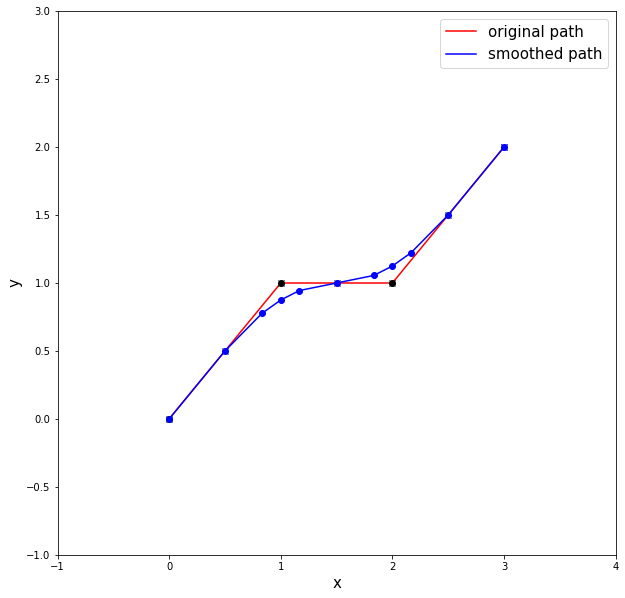

In [10]:
plt.figure(figsize=(10, 10))
plt.xlim(-1, 4)
plt.xlabel("x", fontsize = 15)
plt.ylim(-1, 3)
plt.ylabel("y", fontsize = 15)
plt.plot(rx, ry, '-r', label = 'original path')
plt.plot(rx[0:3], ry[0:3], 'ok')
plt.plot(rx_inter, ry_inter, 'xk')
plt.plot(rx[0], ry[0], 'og')
plt.plot(rx[3], ry[3], 'xb')
plt.plot(rx_smoothed, ry_smoothed, '-b', label = 'smoothed path')
plt.plot(rx_smoothed, ry_smoothed, 'ob')
plt.legend(fontsize = 15)

## For the 2nd pattern

In [11]:
ry = [0, 1, 2, 3]
ry_int = [0.5, 1.5, 2.5]
rx = [0, 1, 1, 2]
rx_int = [0.5, 1, 1.5]

ry_inter = [0, 0.5, 1, 1.5, 2, 2.5, 3]
rx_inter = [0, 0.5, 1, 1, 1, 1.5, 2]
rx_smoothed, ry_smoothed = path_smoother(rx_inter, ry_inter)

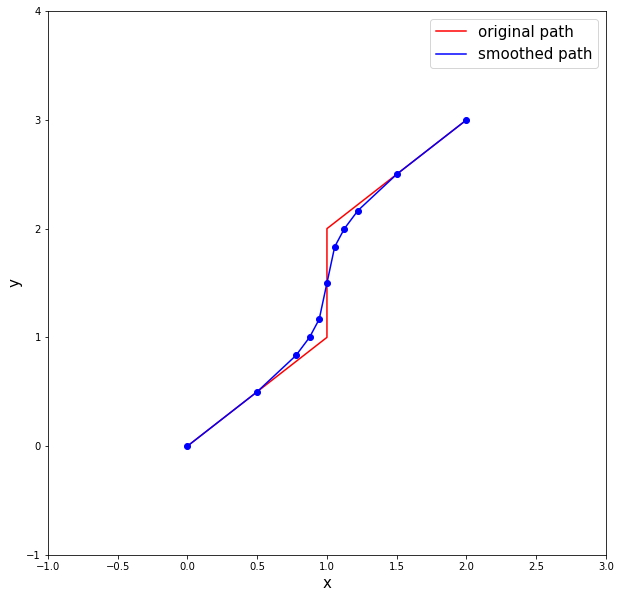

In [12]:
plt.figure(figsize=(10, 10))
plt.xlim(-1, 3)
plt.xlabel("x", fontsize = 15)
plt.ylim(-1, 4)
plt.ylabel("y", fontsize = 15)
plt.plot(rx_inter, ry_inter, '-r', label = 'original path')
plt.plot(rx_smoothed, ry_smoothed, '-b', label = 'smoothed path')
plt.plot(rx_smoothed, ry_smoothed, 'ob')
plt.legend(fontsize = 15)